In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Lee los datos 
csv_file = "../descriptores/descriptores_completos_normalizados.csv"
datos = np.genfromtxt(csv_file, delimiter=',')

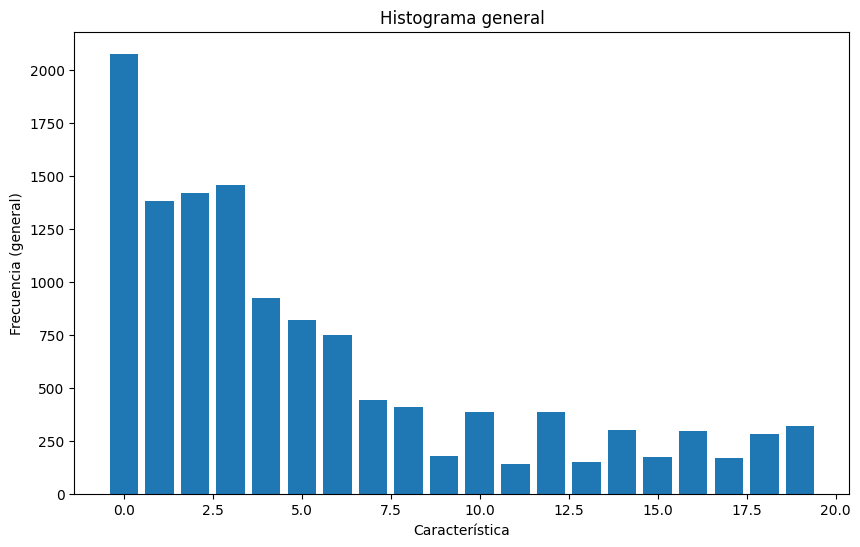

In [2]:

caracteristicas = datos[:, :-1]  # Características
etiqueta = datos[:, -1]     # Etiqueta

# Crea el histograma combinando las características
histograma_general = np.sum(caracteristicas, axis=0)

# Visualiza el histograma
plt.figure(figsize=(10, 6))
plt.bar(range(len(histograma_general)), histograma_general)
plt.title('Histograma general')
plt.xlabel('Característica')
plt.ylabel('Frecuencia (general)')
plt.show()


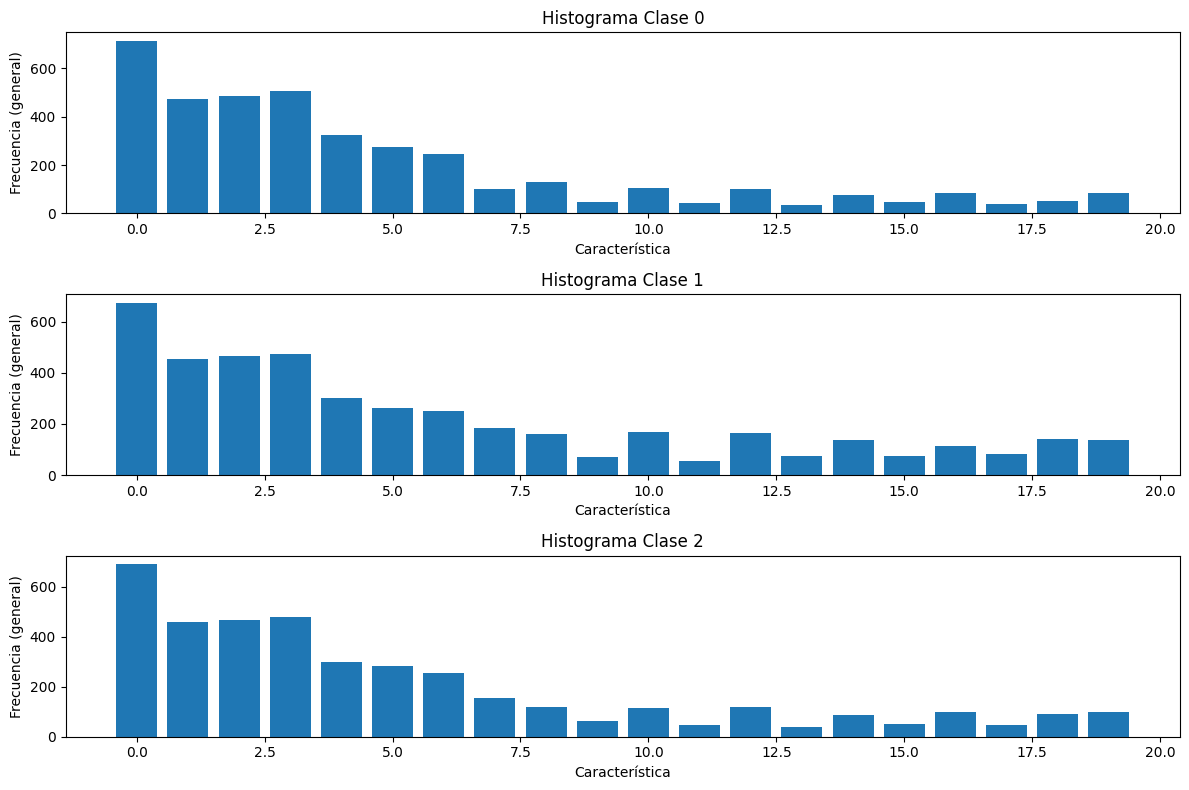

In [3]:
caracteristicas = datos[:, :-1]  # Características
etiqueta = datos[:, -1]     # -etiqueta

# Número de clases
num_clases = len(np.unique(etiqueta))

# Inicializa una lista para almacenar histogramas por clase
histograma_clase = []

# Itera sobre cada clase y calcula el histograma correspondiente
for etiqueta_clase in range(num_clases):
    # Filtra las características por clase
    caracteristicas_clase = caracteristicas[etiqueta == etiqueta_clase]

    # Crea el histograma combinando las características para esta clase
    histograma_general = np.sum(caracteristicas_clase, axis=0)
    
    # Agrega el histograma de esta clase a la lista
    histograma_clase.append(histograma_general)

# Visualiza los histogramas para cada clase
plt.figure(figsize=(12, 8))
for etiqueta_clase, histogram in enumerate(histograma_clase):
    plt.subplot(num_clases, 1, etiqueta_clase+1)
    plt.bar(range(len(histogram)), histogram)
    plt.title('Histograma Clase {}'.format(etiqueta_clase))
    plt.xlabel('Característica')
    plt.ylabel('Frecuencia (general)')

plt.tight_layout()
plt.show()


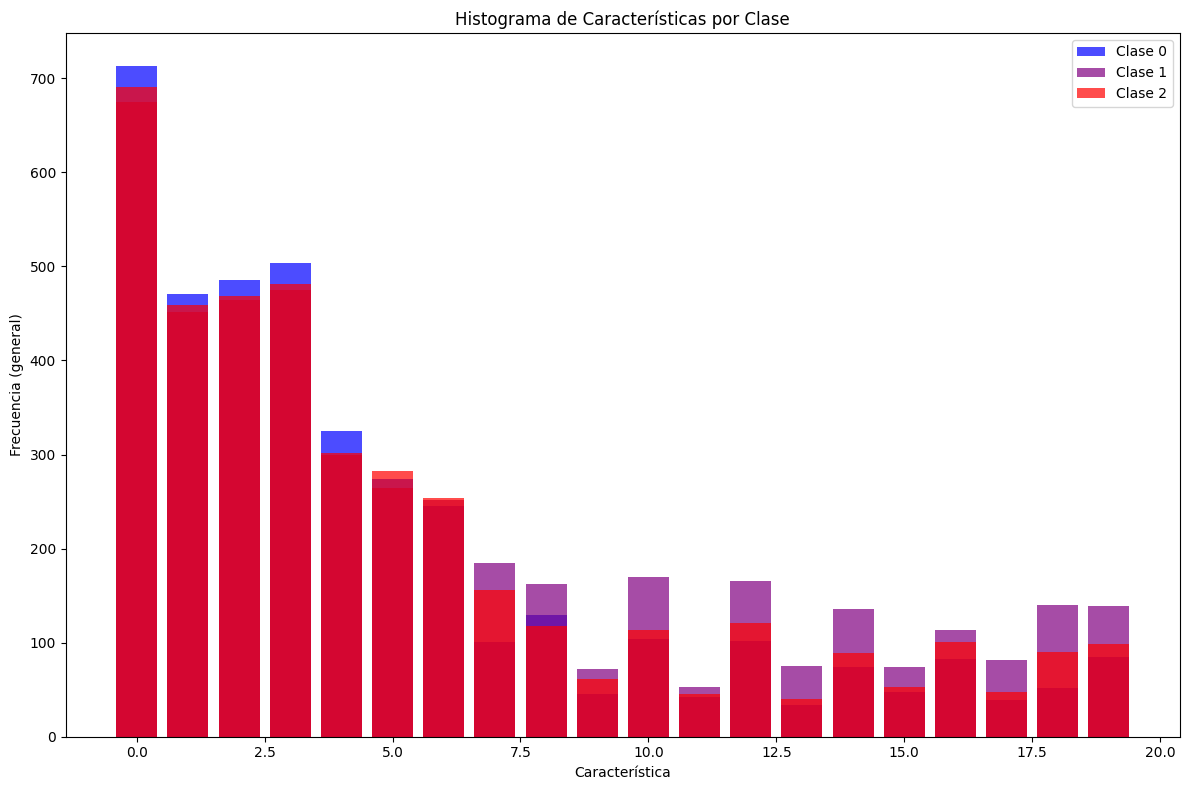

In [3]:
caracteristicas = datos[:, :-1]  # Características
etiqueta = datos[:, -1]     # -etiqueta

# Número de clases
num_clases = len(np.unique(etiqueta))

histograma_clase = []

for etiqueta_clase in range(num_clases):
    caracteristicas_clase = caracteristicas[etiqueta == etiqueta_clase]

    histograma_general = np.sum(caracteristicas_clase, axis=0)
    
    histograma_clase.append(histograma_general)

plt.figure(figsize=(12, 8))

colores = ['blue', 'purple', 'red', 'purple']

for etiqueta_clase, histogram in enumerate(histograma_clase):
    plt.bar(range(len(histogram)), histogram, label=f'Clase {etiqueta_clase}', alpha=0.7, color=colores[etiqueta_clase])

plt.title('Histograma de Características por Clase')
plt.xlabel('Característica')
plt.ylabel('Frecuencia (general)')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import plotly.graph_objs as go
from sklearn.decomposition import PCA

# Cargar los datos desde el archivo CSV
data = pd.read_csv('../descriptores/descriptores_completos_normalizados.csv', header=None)

# Extraer los descriptores y las etiquetas de clase
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Aplicar PCA para reducir la dimensionalidad a 3 dimensiones
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Crear una figura 3D interactiva
fig = go.Figure(data=[go.Scatter3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=y,                # Asignar colores basados en las etiquetas de clase
        colorscale='Viridis',  # Puedes cambiar la paleta de colores según tus preferencias
        opacity=0.8
    )
)])

# Configurar el diseño de la figura
fig.update_layout(scene=dict(
                    xaxis_title='Componente principal 1',
                    yaxis_title='Componente principal 2',
                    zaxis_title='Componente principal 3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

# Mostrar la figura interactiva
fig.show()
